In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


# What is Clustering
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning. 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

![](https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg)

Ref: Wikipedia & https://www.geeksforgeeks.org/clustering-in-machine-learning/


# Different type of Clustering Alogrithm
1. Affinity Propagation
2. Agglomerative Clustering
3. BIRCH
4. DBSCAN
5. K-Means
6. Mini-Batch K-Means
7. Mean Shift
8. OPTICS
9. Spectral Clustering
10. Gaussian Mixture Model

### 1. Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

### 2. Agglomerative clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

### 3. BIRCH Clustering 
(BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

### 4. DBSCAN Clustering 
where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

### 5. K-Means
K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

### 6. Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

### 7. Mean Shift
Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

### 8. OPTICS
OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

### 9. Spectral Clustering
Spectral Clustering is a general class of clustering methods, drawn from linear algebra.

### 10. Gaussian Mixture Model
A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

Ref: https://machinelearningmastery.com/clustering-algorithms-with-python/
Ref: https://scikit-learn.org/stable/modules/clustering.html


# <center> <font size=20 color='Blue'> Unsupervised learning </font> </center>
Clustering the Countries by using Unsupervised Learning for HELP International

### Objective: 
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Read Data

In [2]:
pd.set_option("display.max_colwidth",180)
df = pd.read_csv('../input/unsupervised-learning-on-country-data/Country-data.csv')
data_dict = pd.read_csv('../input/unsupervised-learning-on-country-data/data-dictionary.csv')

# Dataset feature details

In [3]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### Dataframe details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


***Except country feature, other features are either float or integer. there is no text data in the dataframe***

### Statistical Analysis

In [5]:
df.shape

(167, 10)

***There are 167 rows and 10 columns(features)***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


***Observations:***
1. child_mort, exports, imports, income, inflation, gdpp - seems to have large difference between 75% percentile and max value. it looks like these features are right scewed.

In [7]:
df['country'].value_counts()

Mauritius                   1
Botswana                    1
Burundi                     1
Argentina                   1
Lao                         1
                           ..
Central African Republic    1
Suriname                    1
France                      1
Zambia                      1
Italy                       1
Name: country, Length: 167, dtype: int64

***Observations***
1. country feature is identical value, cant be considered as categorical as there is no multiple entries. so, this particular feature might not be helpful for the modeling. but, we shall use for EDA.

### Check if there is null or na values

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

***Fortunately there is no null value identified.***

## Exploratory Data Analysis

In [10]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})

### Univariated data analysis

In [11]:
df['country'].count()

167

***Each row in the dataset belongs to each country data***

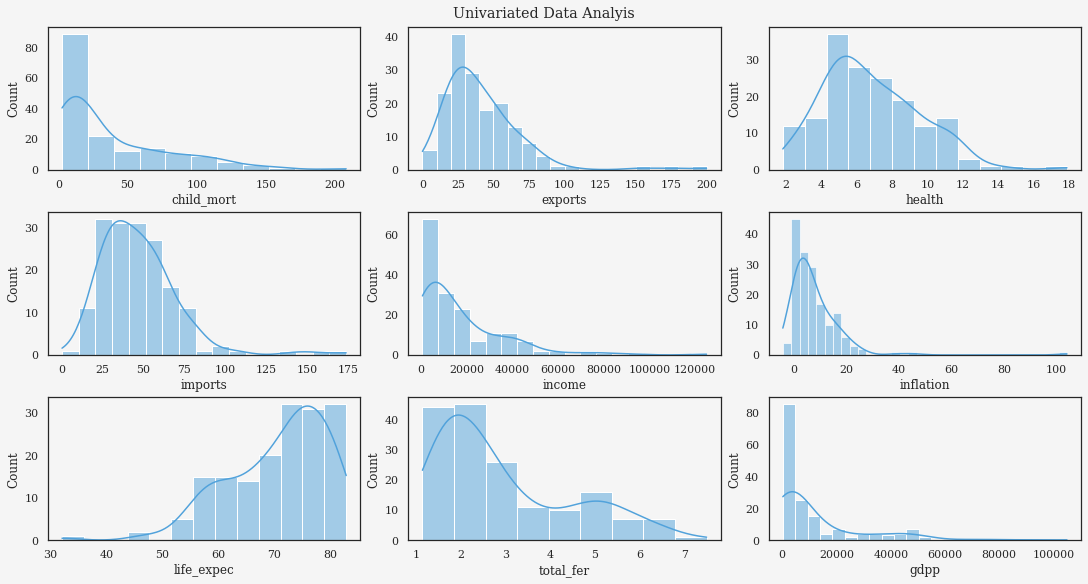

In [12]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True, color=colors[2])

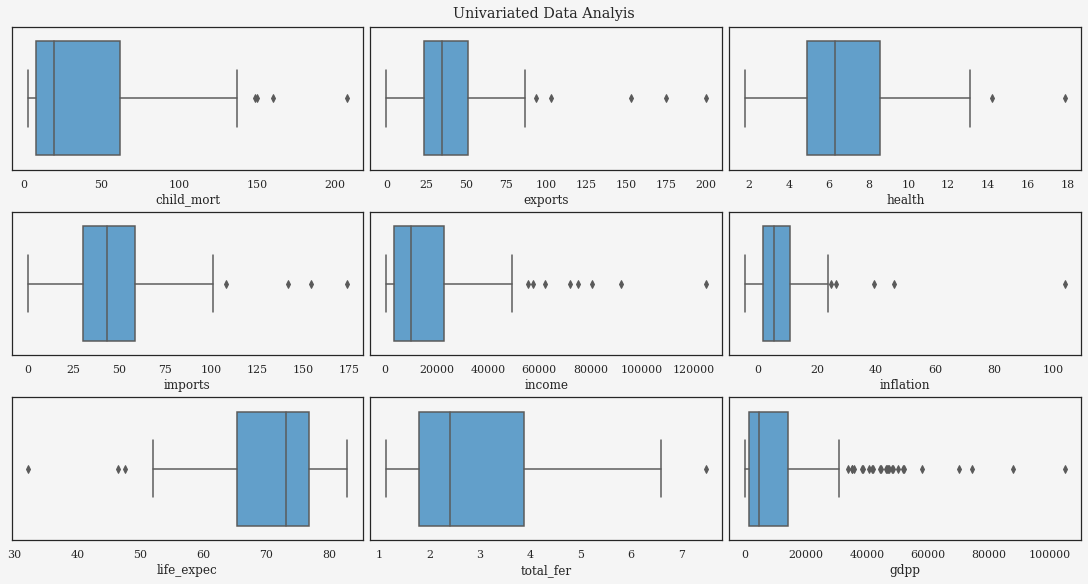

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color=colors[2])

***Observations***
1. Both Histogram and the boxplot clearly shows that the numerical features are contineous or discreate values. there are no features with categorical values. 
2. Box plot shows us there are clear outliers in child_mort, exports, imports, income, gdpp features. however, these informations are belongs to each country. so, we can't expect the values to be normaly distributed wihtout outliers. 
3. Also, the problem statement clearly describes the we need to cluster the countries that need help. so, there are clustering algorithms like ***Manhaten distance*** are less sensible to outliers.

### Bivariated Data Analysis

In [14]:
px.scatter(data_frame=df, x='exports', y='imports',size='gdpp', text='country', color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [15]:
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

***From the above Graphs we can clearly see that there are 2 clusters. Aftican and south Asian countires and rest of the world countries. however, further exploration would help us to learn better***

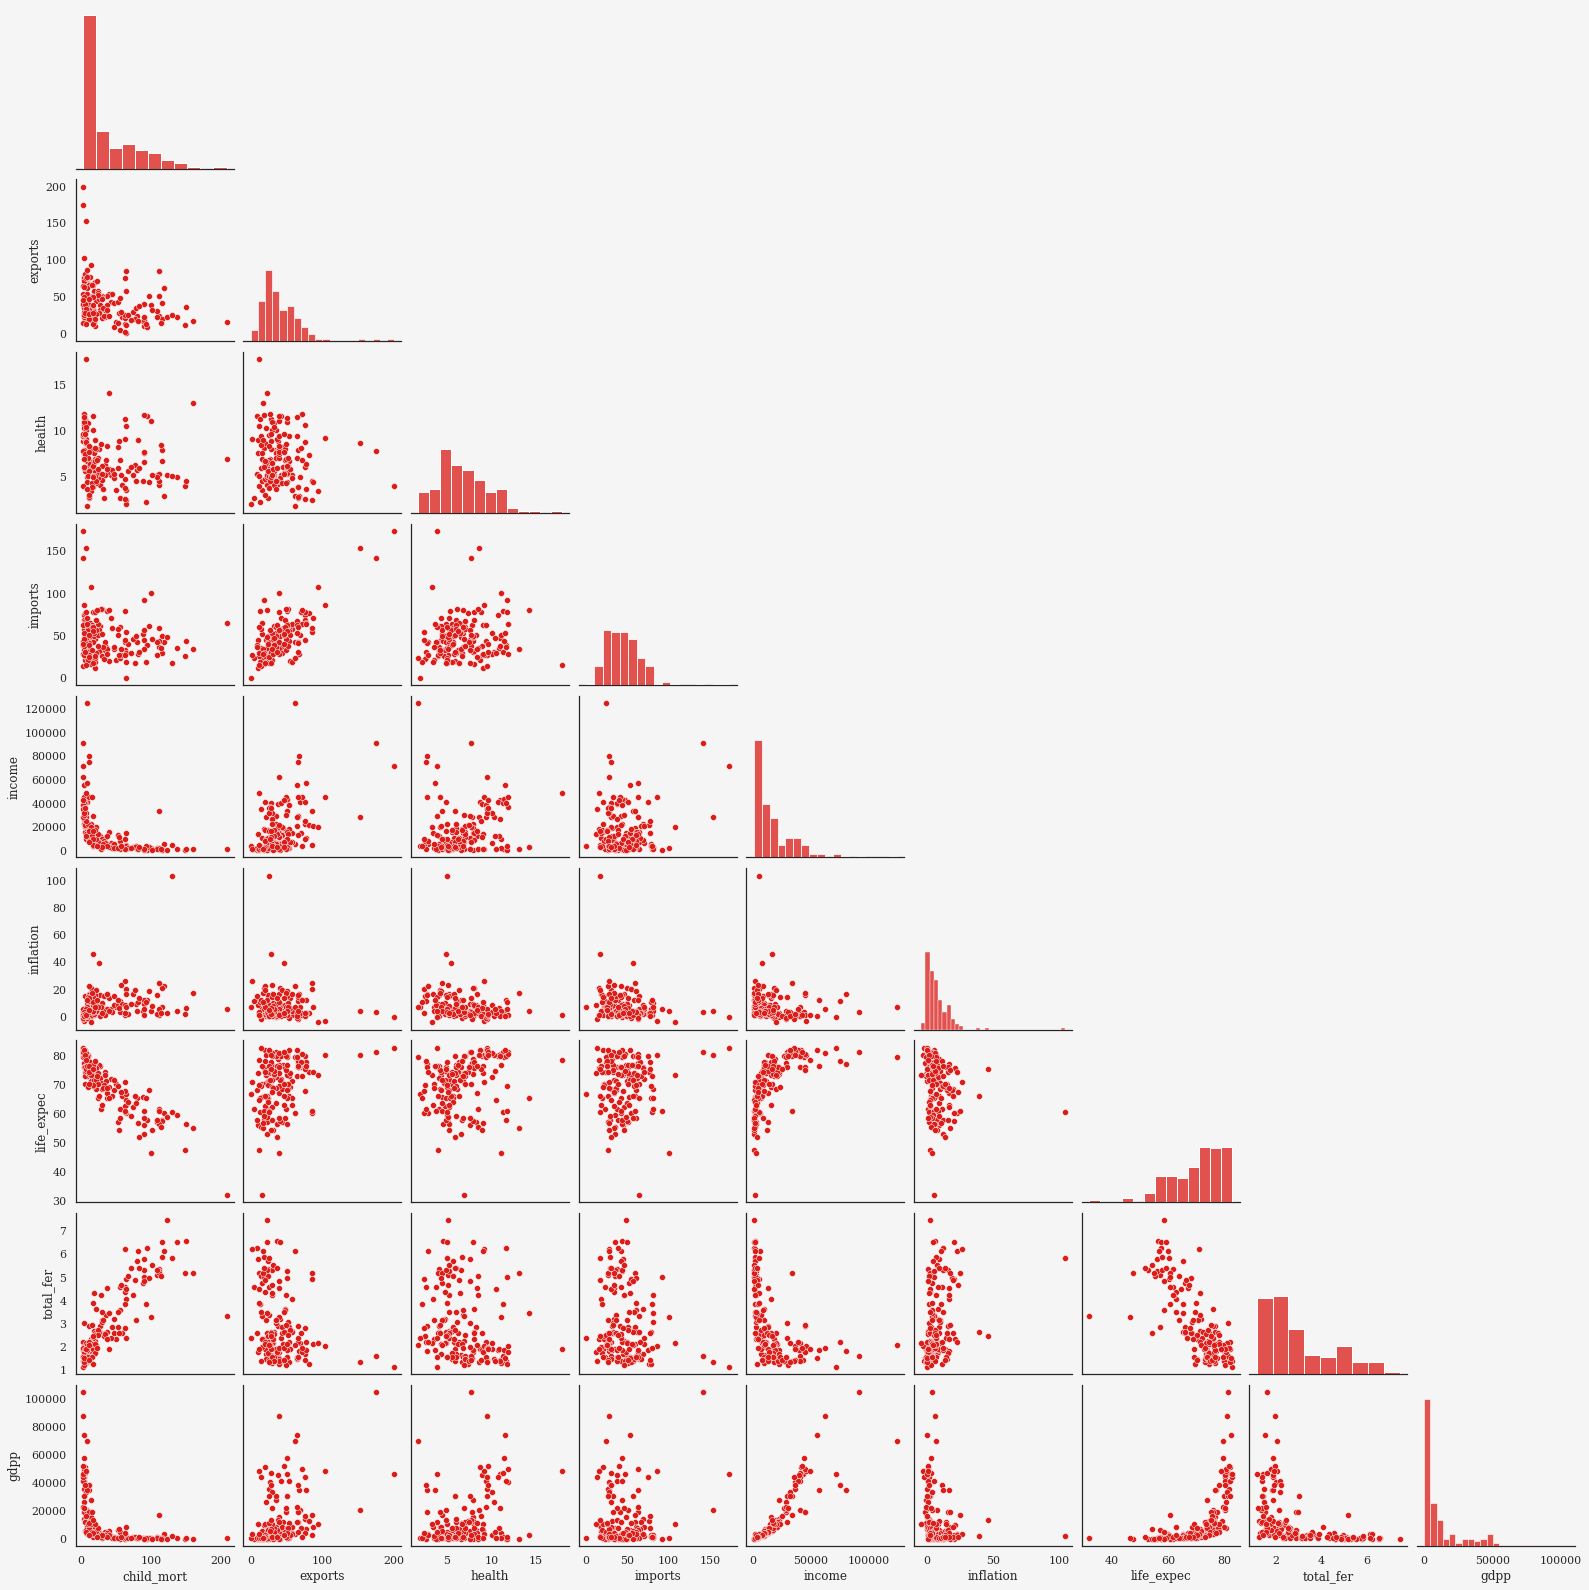

In [16]:
sns.pairplot(df, corner =True)

***Observations***:
1. Child_mort has negative relationship with GDP as the child mortality is less the GDP also increases and vice versa.
2. Export, Income, Income has clear postivite relationship with GDP. 
3. Total_fer and child_mort has postive relationship. 
4. total_fer and life_expec has negative relationship. 
5. life_expec and childe_mort has negative relationship.

<AxesSubplot:>

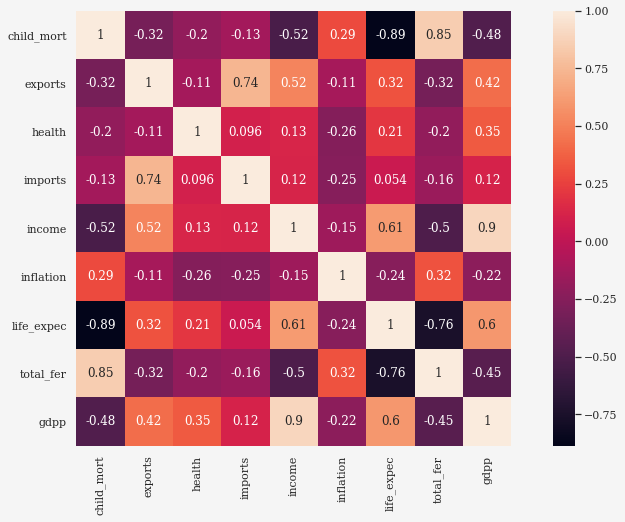

In [17]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, square=True)

## Data Modeling

In [18]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))

### PCA - Principal component analysis
PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. 

In [19]:
from sklearn.decomposition import PCA
decom = PCA(svd_solver='auto')
decom.fit(df_scaled)

PCA()

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'explaned variance ratio')

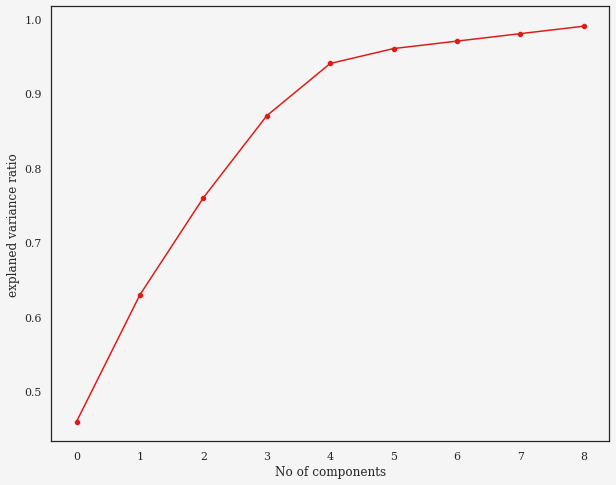

In [20]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

***PCA with number of clusters 3 and 4 as deviation in the variance ratio. even 5 also can be considerd as the difference is less. so, lets us try to use the 3,4,5 cluster combination in K_Mean clustering***

### Hierarachial Clustering

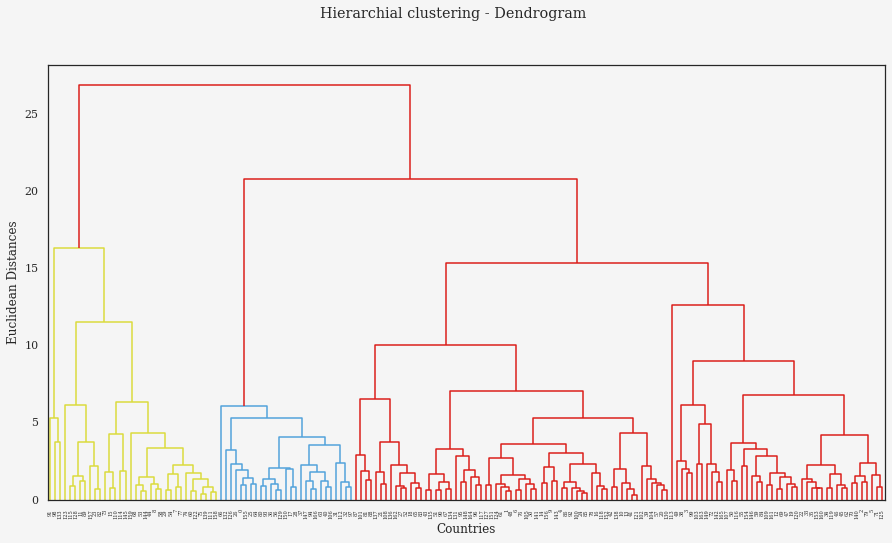

In [21]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

***We can clearly see that there 3 cluster***

### K_Mean Clustering

Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed. KMean is mostly commonly used clustering algorithm

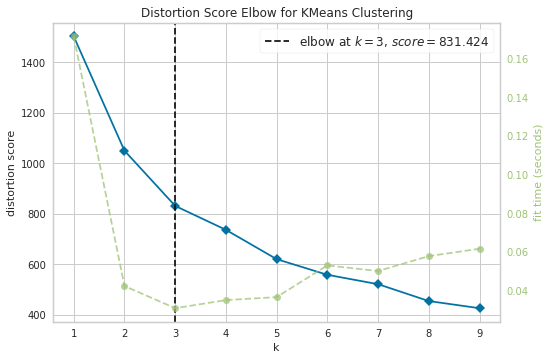

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()


***Elbow method is common method used to validate the clustering algorithm. here we can see the K value 3 with relatively good distortion score.***

<AxesSubplot:xlabel='child_mort', ylabel='health'>

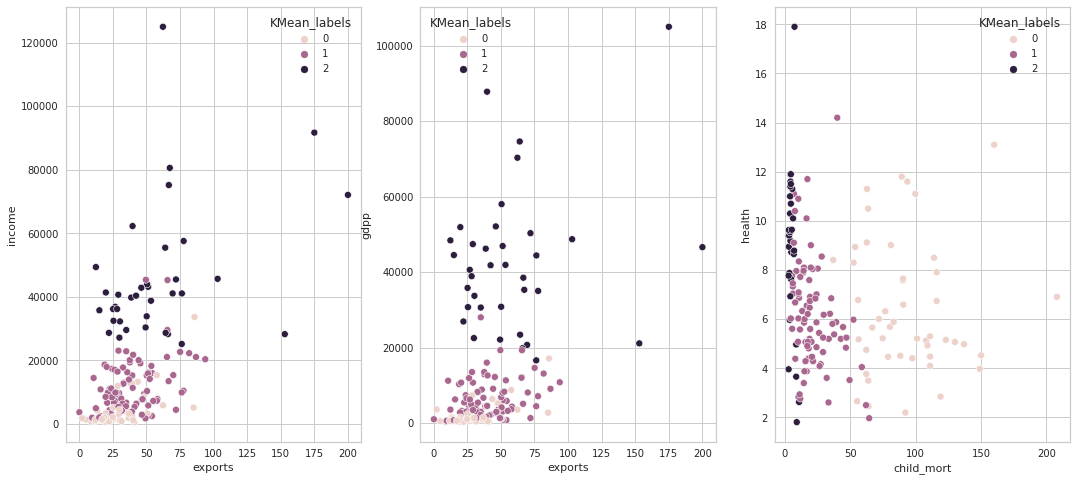

In [23]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)
df['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df, x='exports', y='income', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=df, x='exports', y='gdpp', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=df, x='child_mort', y='health', hue='KMean_labels', ax=ax[2])

In [24]:
df.groupby(['KMean_labels','country']).mean()

child_mort  exports  health  imports  \
KMean_labels country                                                      
0            Afghanistan                 90.2     10.0    7.58     44.9   
             Angola                     119.0     62.3    2.85     42.9   
             Benin                      111.0     23.8    4.10     37.2   
             Botswana                    52.5     43.6    8.30     51.3   
             Burkina Faso               116.0     19.2    6.74     29.6   
...                                       ...      ...     ...      ...   
2            Sweden                       3.0     46.2    9.63     40.7   
             Switzerland                  4.5     64.0   11.50     53.3   
             United Arab Emirates         8.6     77.7    3.66     63.6   
             United Kingdom               5.2     28.2    9.64     30.8   
             United States                7.3     12.4   17.90     15.8   

                                   income  inflation  life_expec  total_fer  \
KMean_labels country                                                          
0            Afghanistan             1610      9.440        56.2       5.82   
             Angola                  5900     22.400        60.1       6.16   
             Benin                   1820      0.885        61.8       5.36   
             Botswana               13300      8.920        57.1       2.88   
             Burkina Faso            1430      6.810        57.9       5.87   
...                                   ...        ...         ...        ...   
2            Sweden                 42900      0.991        81.5       1.98   
             Switzerland            55500      0.317        82.2       1.52   
             United Arab Emirates   57600     12.500        76.5       1.87   
             United Kingdom         36200      1.570        80.3       1.92   
             United States          49400      1.220        78.7       1.93   

                                    gdpp  
KMean_labels country                      
0            Afghanistan             553  
             Angola                 3530  
             Benin                   758  
             Botswana               6350  
             Burkina Faso            575  
...                                  ...  
2            Sweden                52100  
             Switzerland           74600  
             United Arab Emirates  35000  
             United Kingdom        38900  
             United States         48400  

[167 rows x 9 columns]

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,labels=model.labels_)

0.28329575683463126

In [26]:
#df['KMean_labels']=df['KMean_labels'].astype('category')
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
df['KMean_labels']=df['KMean_labels'].map(cat)

px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')

In [27]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='African Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='africa')

In [28]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Asian Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='asia')

***Observations:***
I have clustred the countries in 3 categories. 
1. Need Help
2. Might need help
3. No Help needed

***Conclusion:***
1. Most African countries and Pakistan, Afganistan, Iraq, Yemen, Lao etc falls in the category of "Help Needed" based on the GDP, Income, Health rate etc
2. Most Asian countires fall in 2nd category
3. American, Australian countires, Canada & Europian may not need help. 

In [29]:
df[df['KMean_labels']=='Need Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

### Please revewi the Kernel and provide your input for further improvements. Appriciate your feedback and comments